# All wtsp-cli process commands

## Author: Luis Eduardo Ferro Diez, <a href="mailto:luisedof10@gmail.com">luisedof10@gmail.com</a>

This notebook contains a sample of all the commands available from the `cli` to help understand the process from command line.

#### Note:
All the commands below can be executed either directly from the command line after installing the cli, or via the docker container. In this notebook I'm using the docker container for simplicity. The only difference with docker in the commands below will be the addition of `docker container exec -it wtsp`. For example:

Run in docker container: `docker container exec -it wtsp wtsp --help`

Run directly in terminal: `wtsp --help`

## Run the docker container

In [1]:
workdir = "<path-to-workdir>"

In [6]:
!export WORK_DIR="<path-to-workdir>" && docker-compose --file ../../../env/docker/docker-compose.yml up -d

Creating network "docker_wtsp-net" with driver "bridge"
Creating wtsp ... 
ting wtsp ... done

In [143]:
!docker container ls

CONTAINER ID        IMAGE                COMMAND                  CREATED             STATUS              PORTS               NAMES
3bdb3ab066ec        ohtar10/wtsp:0.1.1   "tail -f /var/log/la…"   2 seconds ago       Up 1 second                             wtsp


Your files will be mounted in `/workdir`

In [144]:
!docker container exec -it wtsp ls -lah /workdir

total 48K
drwx------  9 1000 1000 4.0K May 22 09:27 .
drwxr-xr-x  1 root root 4.0K May 30 15:00 ..
drwx------  5 1000 1000 4.0K Sep 29  2019 .Trash-1000
drwxr-xr-x  3 root root 4.0K May  1 18:34 EFI
drwxrwxr-x  3 1000 1000 4.0K Sep 14  2019 OneDrive
drwxrwxr-x 12 1000 1000 4.0K May 25 20:26 datasets
drwxr-xr-x  3 root root 4.0K May  1 18:34 loader
drwx------  2 root root  16K Sep 14  2019 lost+found
drwxr-xr-x  3 root root 4.0K May 22 09:27 output


## Command help

In [111]:
!docker container exec -it wtsp wtsp --help

Using TensorFlow backend.
Usage: wtsp [OPTIONS] COMMAND [ARGS]...

  Where To Sell Products (wtsp) 0.1.1.

Options:
  --debug / --no-debug  Enable debug output.
  -wd, --work-dir TEXT  Which folder to use as working directory. Default to
                        ~/wtsp

  --help                Show this message and exit.

Commands:
  describe  Describe module.
  predict   Predict module.
  train     Train module.


## Describe
### Describe tweets

In [112]:
!docker container exec -it wtsp wtsp describe --help

Using TensorFlow backend.
Usage: wtsp describe [OPTIONS] COMMAND [ARGS]...

  Describe module.

  Use this module to generate descriptive data  that might help you to take
  decisions.

Options:
  --help  Show this message and exit.

Commands:
  products  Describe products.
  tweets    Describe tweets.


In [113]:
!docker container exec -it wtsp wtsp describe tweets --help

Using TensorFlow backend.
Usage: wtsp describe tweets [OPTIONS] INPUT_DATA

  Describe tweets.

  Use this command to print counts of tweets per place_name.

Options:
  -f, --filters TEXT        Filters to use over the data set columns to narrow
                            down the load.  [required]

  -o, --output-dir TEXT     Path where the describe results will be printed
                            out.

  -g, --groupby TEXT        The group by column to use.
  -c, --count TEXT          The value to count by group.
  -mc, --min-count INTEGER  Only present counts above this minimum count
  --help                    Show this message and exit.


In [114]:
!docker container exec -it wtsp wtsp describe tweets -mc 10 -f country_code=US -o /workdir/output/ /workdir/tweets/tweets.parquet

Using TensorFlow backend.
INFO - 2020-05-30 14:51:08,736: Describing elements in /workdir/tweets/tweets.parquet 
INFO - 2020-05-30 14:51:08,736: Filtering records... 
INFO - 2020-05-30 14:51:08,758: Aggregating and counting records... 
To request implementation, send an email to feature_requests@modin.org.
INFO - 2020-05-30 14:51:08,871: Saving results in destination folder: /workdir/output//tweets/country_code=US 
Result generated successfully at: /workdir/output//tweets/country_code=US


In [115]:
import pandas as pd

describe_tweets = pd.read_csv(f"{workdir}/output/tweets/country_code=US/counts.csv")
describe_tweets.head()

,Unnamed: 0,place_name,tweetcount
0,3,Los Angeles,35
1,5,San Diego,15
2,6,Texas,14
3,0,California,13
4,1,Dallas,13


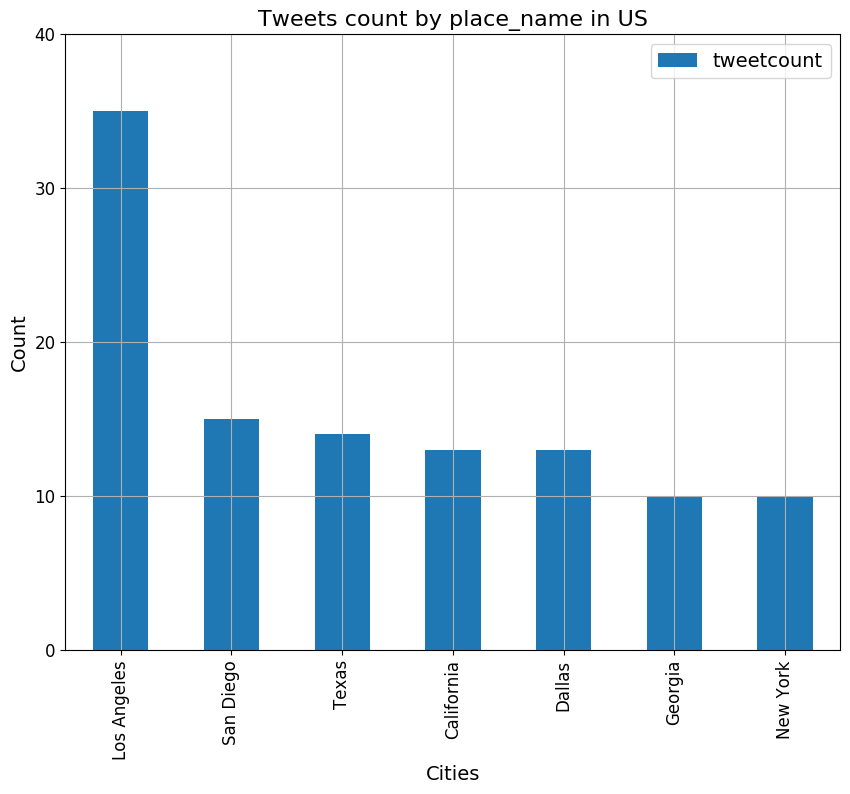

In [116]:
from IPython.display import Image
Image(filename=f"{workdir}/output/tweets/country_code=US/bar_chart.png")

### Describe Products

In [117]:
!docker container exec -it wtsp wtsp describe products --help

Using TensorFlow backend.
Usage: wtsp describe products [OPTIONS] INPUT_DATA

  Describe products.

  Use this command to print counts of products per category.

Options:
  -o, --output-dir TEXT     Path where the describe results will be printed
                            out.

  -g, --groupby TEXT        The group by column to use.
  -c, --count TEXT          The value to count by group.
  -mc, --min-count INTEGER  Only present counts above this minimum count
  --explode                 Enable exploding of the groupby column.
  --help                    Show this message and exit.


In [118]:
%%time
!docker container exec -it wtsp wtsp describe products --groupby categories --explode -mc 10 -o /workdir/output /workdir/products/products.parquet

Using TensorFlow backend.
INFO - 2020-05-30 14:51:23,709: Describing elements in /workdir/products/products.parquet 
INFO - 2020-05-30 14:51:23,709: Expanding values in categories 
To request implementation, send an email to feature_requests@modin.org.
(pid=492) Using TensorFlow backend.
(pid=490) Using TensorFlow backend.
(pid=491) Using TensorFlow backend.
(pid=489) Using TensorFlow backend.
INFO - 2020-05-30 14:51:25,377: Aggregating and counting records... 
INFO - 2020-05-30 14:51:25,461: Saving results in destination folder: /workdir/output/documents 
Result generated successfully at: /workdir/output/documents
CPU times: user 109 ms, sys: 15.4 ms, total: 124 ms
Wall time: 7.22 s


In [119]:
import pandas as pd
describe_products = pd.read_csv(f"{workdir}/output/documents/counts.csv")
describe_products

,Unnamed: 0,categories,documentcount
0,0,Books,320
1,8,"Technology, Electronics & Accessories",230
2,3,Home & Kitchen,214
3,1,"Clothing, Shoes & Jewelry",144
4,7,Sports & Outdoors,109
5,2,Health & Personal Care,106
6,9,Toys & Games,90
7,5,Music,61
8,4,Movies & TV,54
9,6,Office & School Supplies,26


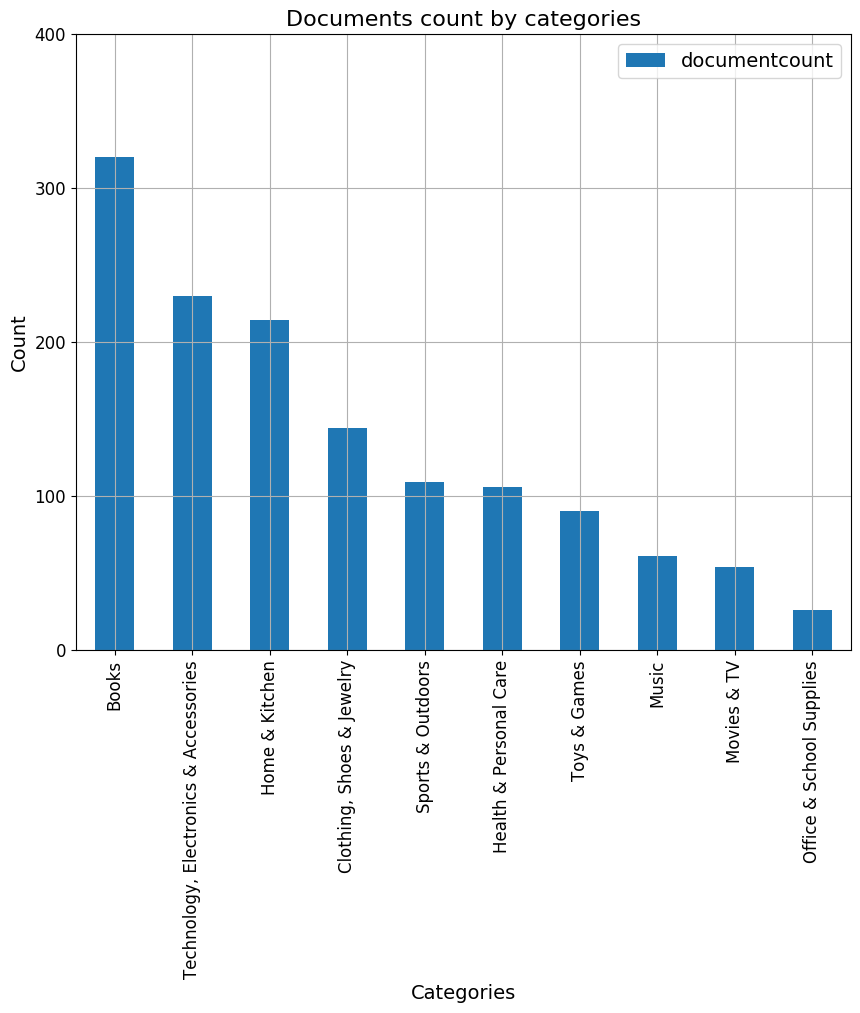

In [120]:
Image(filename=f"{workdir}/output/documents/bar_chart.png")

## Train
### Train product embeddings

In [121]:
!docker container exec -it wtsp wtsp train --help

Using TensorFlow backend.
Usage: wtsp train [OPTIONS] COMMAND [ARGS]...

  Train module.

  Use this module to train the different models used for the project.

Options:
  --help  Show this message and exit.

Commands:
  products  Train ML models for products.
  tweets    Train ML models within the tweets domain.


In [122]:
!docker container exec -it wtsp wtsp train products --help

Using TensorFlow backend.
Usage: wtsp train products [OPTIONS] INPUT_DATA

  Train ML models for products.

  Trains the model requested with --model option and using the hyper
  parameters in the form:

  KWARGS: Depending on the model to train, the arguments my vary. Provide
  them as a comma separated key=value argument string, e.g.,
  key1=value1,key2=value2. Arguments with (*) are mandatory.

  For model 'embeddings':

      label_col           The column name that holds the label     doc_col
      The column name that holds the document     lr                  The
      learning rate     epochs              The epochs/iterations to train
      the Doc2Vec     vec_size            The desired embedding vector size
      alpha               Alpha parameter to pass to Doc2Vec     min_alpha
      Minimum alpha parameter for the Doc2Vec model

  For model 'classifier':

      label_col           The column name that holds the label     doc_col
      The column name that holds the docum

In [123]:
%%time
!docker container exec -it wtsp wtsp train products --model embeddings \
--params label_col=categories,doc_col=document,lr=0.0002,epochs=5,vec_size=300,alpha=0.025,min_alpha=0.00025,min_count=1 \
/workdir/products/products.parquet

Using TensorFlow backend.
INFO - 2020-05-30 14:51:46,075: Creating tagged documents... 
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
(pid=769) Using TensorFlow backend.
(pid=771) Using TensorFlow backend.
(pid=770) Using TensorFlow backend.
(pid=768) Using TensorFlow backend.
INFO - 2020-05-30 14:51:52,583: Training document embeddings... 
INFO - 2020-05-30 14:51:52,583: Building vocabulary out of 1182 documents... 
INFO - 2020-05-30 14:51:52,612: collecting all words and their counts 
INFO - 2020-05-30 14:51:52,660: PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags 
INFO - 2020-05-30 14:51:52,683: collected 11450 word types and 10 unique tags from a corpus of 1182 examples and 99891 words 
INFO - 2020-05-30 14:51:52,684: Loading a fresh vocabulary 
INFO - 2020-05-30 14:51:52,704: effective_min_c

The embeddings model is stored in the default directory.

In [124]:
!docker container exec -it wtsp ls -lah /root/wtsp/products/models/embeddings

total 41M
drwxr-xr-x 2 root root 4.0K May 30 14:51 .
drwxr-xr-x 3 root root 4.0K May 30 14:51 ..
-rw-r--r-- 1 root root  41M May 30 14:51 d2v_model.model


### Train product classifier
### Prerequisites:
* The embeddings should have been trained, or an embeddings model should be located in the expected path.
* If the embeddings are already trained but are located on a different folder, you must use the `-wd` argument at main command level to specify the path to the models directory.

In [125]:
!docker container exec -it wtsp wtsp train products --help

Using TensorFlow backend.
Usage: wtsp train products [OPTIONS] INPUT_DATA

  Train ML models for products.

  Trains the model requested with --model option and using the hyper
  parameters in the form:

  KWARGS: Depending on the model to train, the arguments my vary. Provide
  them as a comma separated key=value argument string, e.g.,
  key1=value1,key2=value2. Arguments with (*) are mandatory.

  For model 'embeddings':

      label_col           The column name that holds the label     doc_col
      The column name that holds the document     lr                  The
      learning rate     epochs              The epochs/iterations to train
      the Doc2Vec     vec_size            The desired embedding vector size
      alpha               Alpha parameter to pass to Doc2Vec     min_alpha
      Minimum alpha parameter for the Doc2Vec model

  For model 'classifier':

      label_col           The column name that holds the label     doc_col
      The column name that holds the docum

In [126]:
%%time
!docker container exec -it wtsp wtsp train products --model classifier \
--params label_col=categories,doc_col=document,classes=10,test_size=0.3,lr=0.001,epochs=10,vec_size=300 \
/workdir/products/products.parquet

Using TensorFlow backend.
INFO - 2020-05-30 14:52:13,489: loading Doc2Vec object from /root/wtsp/products/models/embeddings/d2v_model.model 
INFO - 2020-05-30 14:52:13,678: loading vocabulary recursively from /root/wtsp/products/models/embeddings/d2v_model.model.vocabulary.* with mmap=None 
INFO - 2020-05-30 14:52:13,679: loading trainables recursively from /root/wtsp/products/models/embeddings/d2v_model.model.trainables.* with mmap=None 
INFO - 2020-05-30 14:52:13,679: loading wv recursively from /root/wtsp/products/models/embeddings/d2v_model.model.wv.* with mmap=None 
INFO - 2020-05-30 14:52:13,679: loading docvecs recursively from /root/wtsp/products/models/embeddings/d2v_model.model.docvecs.* with mmap=None 
INFO - 2020-05-30 14:52:13,679: loaded /root/wtsp/products/models/embeddings/d2v_model.model 
INFO - 2020-05-30 14:52:13,696: Transforming documents into embeddings... 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already u

The classifier was trained and stored in the default location

In [127]:
!docker container exec -it wtsp ls -lah /root/wtsp/products/models/classifier

total 20M
drwxr-xr-x 2 root root 4.0K May 30 14:52 .
drwxr-xr-x 4 root root 4.0K May 30 14:52 ..
-rw-r--r-- 1 root root  611 May 30 14:52 category_encoder.model
-rw-r--r-- 1 root root 136K May 30 14:52 classification_report.png
-rw-r--r-- 1 root root 7.1K May 30 14:52 prod_classifier-def.yaml
-rw-r--r-- 1 root root  19M May 30 14:52 prod_classifier-weights.h5
-rw-r--r-- 1 root root  67K May 30 14:52 training_history.png


Along with the clasification report and the training plots for reference.

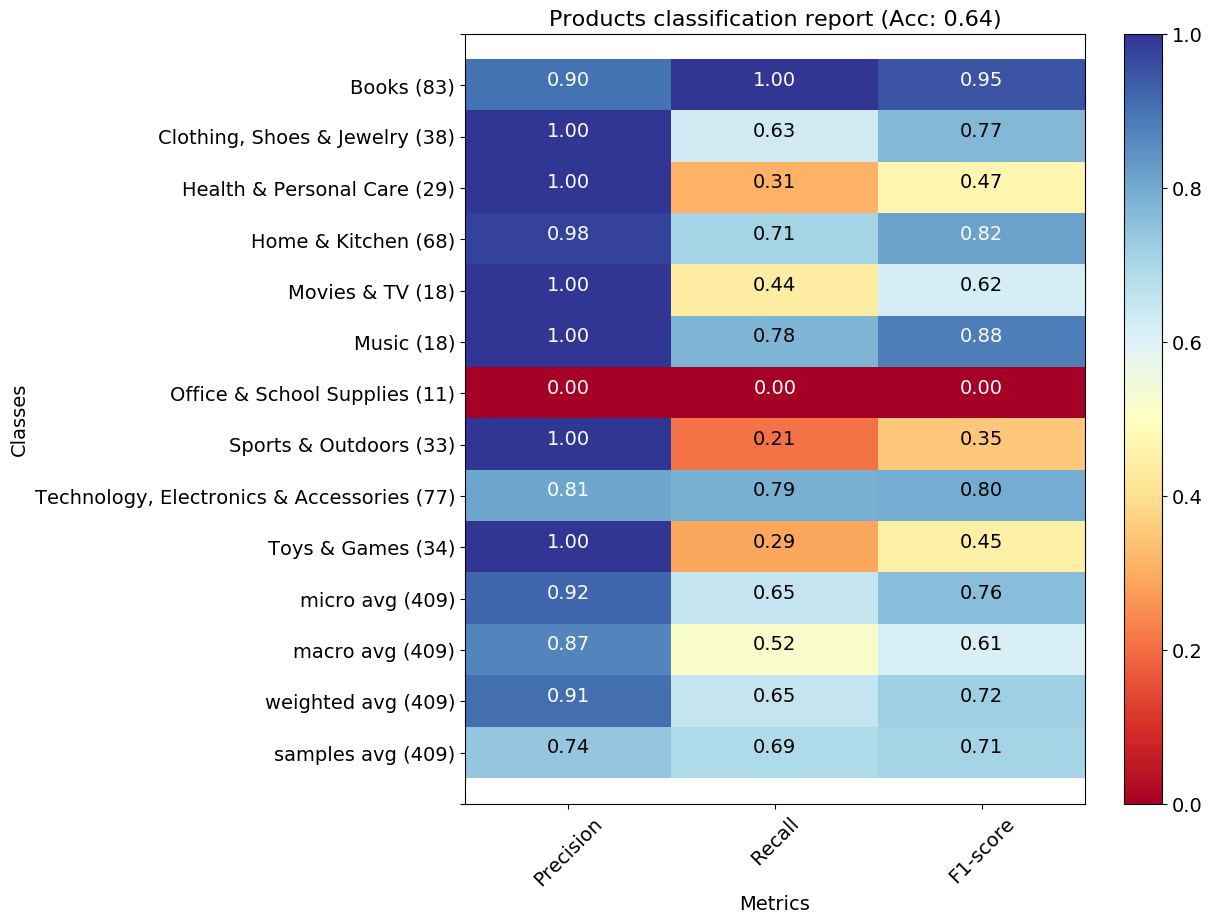

In [128]:
from IPython.display import Image
!docker container cp wtsp:/root/wtsp/products/models/classifier/classification_report.png ./classification_report.png
Image(filename="classification_report.png")

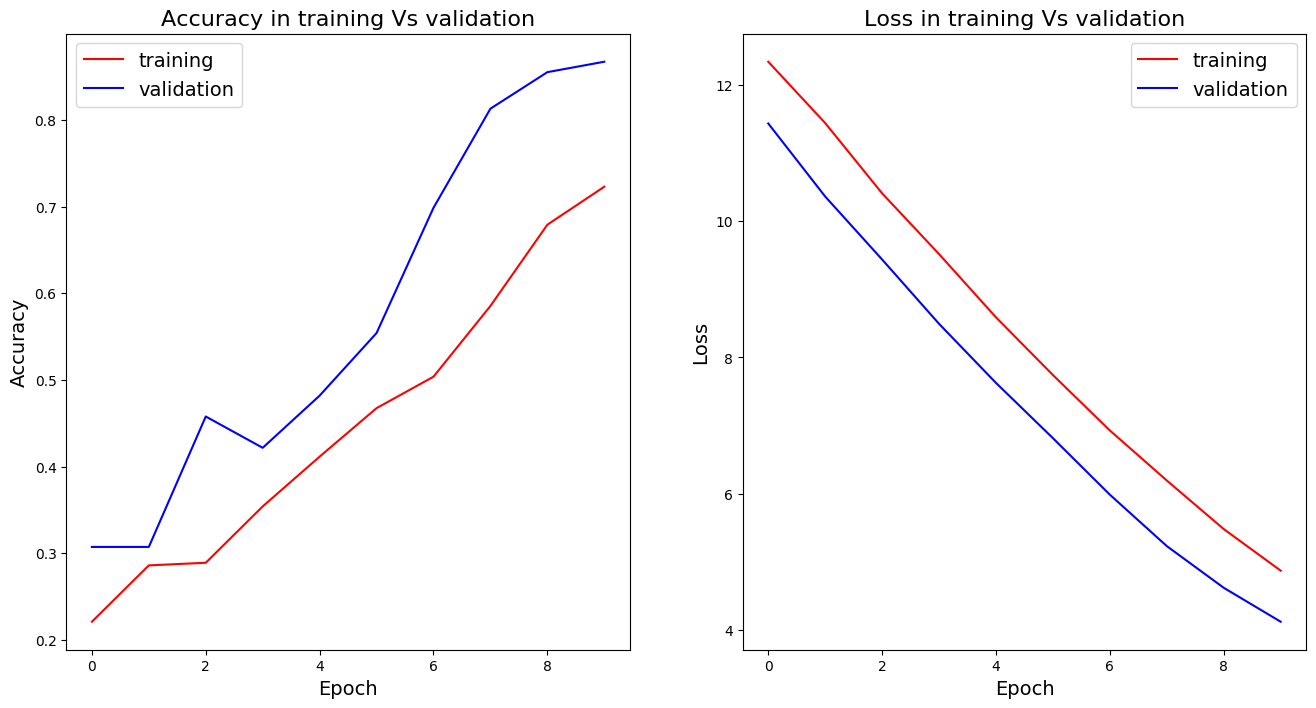

In [129]:
!docker container cp wtsp:/root/wtsp/products/models/classifier/training_history.png ./training_history.png
Image(filename="training_history.png")

### Train tweets Nearest Neighbors

In [130]:
!docker container exec -it wtsp wtsp train tweets --help

Using TensorFlow backend.
Usage: wtsp train tweets [OPTIONS] INPUT_DATA

  Train ML models within the tweets domain.

  Provide the model to train via the --model option (default to 'nearest-
  neighbors')

  KWARGS: Depending on the model to train, the arguments my vary. Provide
  them as a comma separated key=value argument string, e.g.,
  key1=value1,key2=value2. Arguments with (*) are mandatory

  For model 'nearest-neighbors':

      n_neighbors*         The number of neighbors to consider
      location_column*     the location column with the geometry

Options:
  -m, --model TEXT       Executes a model training in the tweets domain
  -f, --filters TEXT     Filters to use over the data set columns to narrow
                         down the load.  [required]

  -p, --params TEXT      Model parameters  [required]
  -o, --output-dir TEXT  Path where the describe results will be printed out.
  --help                 Show this message and exit.


In [131]:
!docker container exec -it wtsp wtsp train tweets --model "nearest-neighbors" \
--filters "place_name=Los Angeles" \
-o /workdir/output \
--params n_neighbors=10,location_column=location_geometry \
/workdir/tweets/tweets.parquet

Using TensorFlow backend.
INFO - 2020-05-30 14:53:28,143: Training nearest-neighbors on /workdir/tweets/tweets.parquet 
INFO - 2020-05-30 14:53:28,143: Transforming input data to get the geo-points 
INFO - 2020-05-30 14:53:28,246: Filtering records... 
(pid=1494) Using TensorFlow backend.
(pid=1497) Using TensorFlow backend.
INFO - 2020-05-30 14:53:29,912: Training the nearest neighbors model... 
Result generated successfully at: /workdir/output/tweets/place_name=Los Angeles


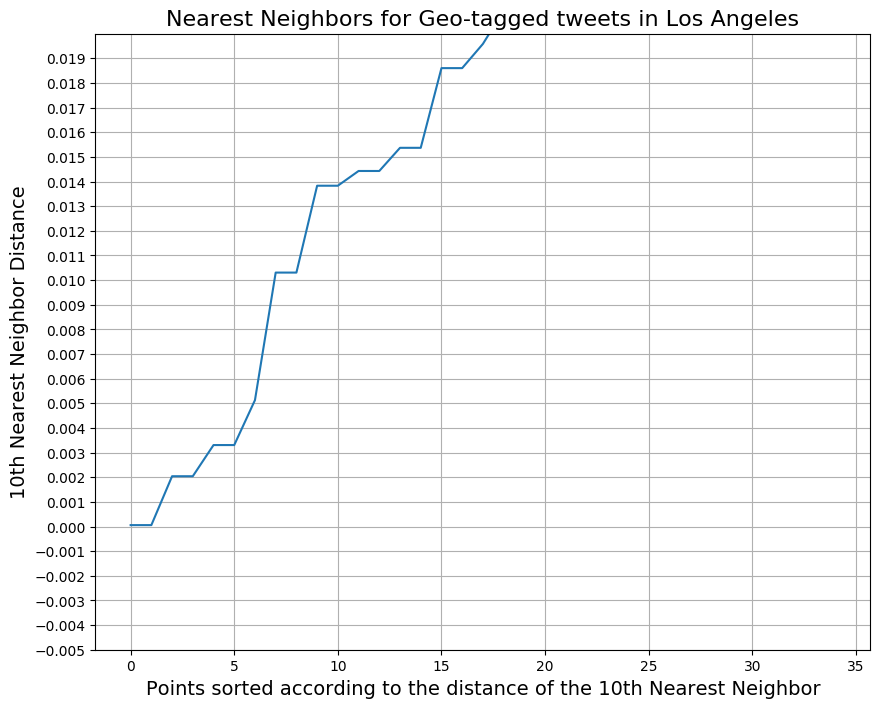

In [132]:
Image(filename=f"{workdir}/output/tweets/place_name=Los Angeles/nearest_neighbors.png")

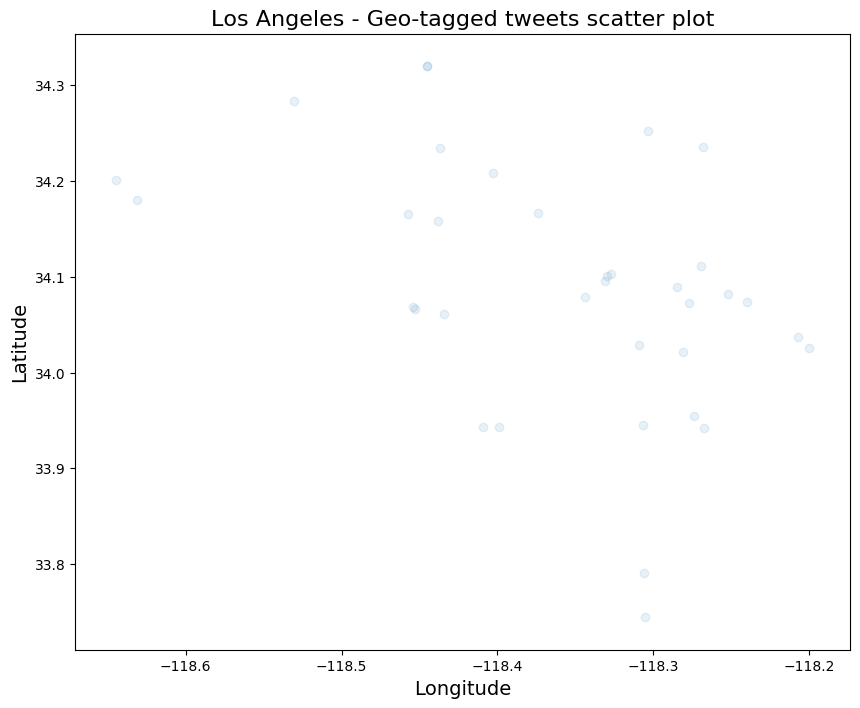

In [133]:
Image(filename=f"{workdir}/output/tweets/place_name=Los Angeles/scatter_plot.png")

## Predict
This subcommand contains the logic that ties up everything togheter and delivers a result.
### Predict where to sell products

In [134]:
!docker container exec -it wtsp wtsp predict --help

Using TensorFlow backend.
Usage: wtsp predict [OPTIONS] INPUT_DATA

  Predict module.

  Use this module to transform data using the trained models.

  Note: You need to train the embeddings and classifier first, ensure that
  these models are already trained in your working directory.

  Params:

      center          The geographic coordinates to center the map output in
      format: lat;long, e.g., 34.1;118.3     eps             The epsilon
      value to train the DBSCAN cluster based on the nearest neighbors
      model.     n_neighbors     The minimum number of neighbors per cluster
      location_column The name of the column containing the location to use
      min_score       The minimum classification score to show on clusters.

Options:
  -f, --filters TEXT  Filters to use over the data set columns to narrow down
                      the load.  [required]

  -p, --params TEXT   Model parameters  [required]
  --help              Show this message and exit.


In [135]:
!docker container exec -it wtsp wtsp predict clusters --filters "place_name=Los Angeles" \
--params center='34;-118',eps=0.04,n_neighbors=2,location_column=location_geometry,min_score=0.1 \
/workdir/tweets/tweets.parquet

Using TensorFlow backend.
INFO - 2020-05-30 14:53:40,199: Loading ML models 
INFO - 2020-05-30 14:53:40,199: Transforming and predicting the data. 
INFO - 2020-05-30 14:53:40,199: Filtering records... 
(pid=1687) Using TensorFlow backend.
(pid=1686) Using TensorFlow backend.
To request implementation, send an email to feature_requests@modin.org.
INFO - 2020-05-30 14:53:45,885: loading Doc2Vec object from /root/wtsp/products/models//embeddings/d2v_model.model 
INFO - 2020-05-30 14:53:46,077: loading vocabulary recursively from /root/wtsp/products/models//embeddings/d2v_model.model.vocabulary.* with mmap=None 
INFO - 2020-05-30 14:53:46,077: loading trainables recursively from /root/wtsp/products/models//embeddings/d2v_model.model.trainables.* with mmap=None 
INFO - 2020-05-30 14:53:46,078: loading wv recursively from /root/wtsp/products/models//embeddings/d2v_model.model.wv.* with mmap=None 
INFO - 2020-05-30 14:53:46,078: loading docvecs recursively from /root/wtsp/products/models//emb

Results are generated in the interal working directory.

In [136]:
!docker container exec -it wtsp ls -lah "/root/wtsp/where_to_sell_in/place_name=Los Angeles"

total 40K
drwxr-xr-x 2 root root 4.0K May 30 14:53 .
drwxr-xr-x 3 root root 4.0K May 30 14:53 ..
-rw-r--r-- 1 root root  19K May 30 14:53 classified_clusters.csv
-rw-r--r-- 1 root root  12K May 30 14:53 classified_clusters.html


In [137]:
!docker container cp wtsp:"/root/wtsp/where_to_sell_in/place_name=Los Angeles/classified_clusters.csv" ./
!docker container cp wtsp:"/root/wtsp/where_to_sell_in/place_name=Los Angeles/classified_clusters.html" ./

Now we can explore the results

In [138]:
classified_clusters = pd.read_csv("./classified_clusters.csv")
classified_clusters.head()

,cluster,size,polygon,corpus,d2v_embeddings,predictions
0,1,5,"POLYGON ((-118.26970294 34.11099196, -118.2849...","@Xx_that_xx if it isn't limited edition, I wou...",[-0.06394511 -0.06546416 -0.2207332 0.226925...,"[('Books', 0.8504459857940674), ('Music', 0.04..."
1,2,4,"POLYGON ((-118.34366794 34.07845063, -118.3312...",Ill be at day of the dead 🙌😌\nAbout to get my ...,[-0.06461848 -0.05372534 -0.25851804 0.234416...,"[('Books', 0.4996708929538727), ('Home & Kitch..."
2,4,3,"POLYGON ((-118.30649935 33.94529845, -118.2671...",“@Drake: That ovo and that xo is everything yo...,[-4.24450859e-02 -4.08858135e-02 -1.81264669e-...,"[('Books', 0.5990639328956604), ('Toys & Games..."
3,7,3,"POLYGON ((-118.4342623 34.06113687, -118.45422...","""ill protect you from the world.""\nShout out t...",[-0.09505285 -0.03960399 -0.19751708 0.217001...,"[('Books', 0.9632371664047241), ('Health & Per..."


In [139]:
from IPython.display import IFrame
IFrame(src='./classified_clusters.html', width=700, height=600)

## Tada!!!!
Don't forget to backup the models and shutdown the container!

In [7]:
!docker-compose --file ../../../env/docker/docker-compose.yml down

Stopping wtsp ... 
Removing wtsp ... mdone
Removing network docker_wtsp-net
